In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


In [2]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
gas_turbines = pd.read_csv("gas_turbines.csv", delimiter=",")

In [5]:
gas_turbines.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


**Perform Initial EDA**


In [6]:
gas_turbines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas_turbines[gas_turbines.duplicated()]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


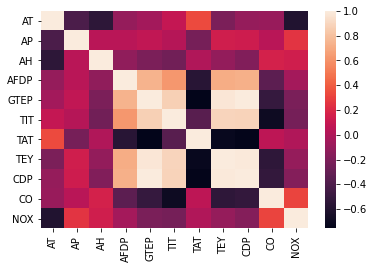

In [9]:
import seaborn as sns
cor = gas_turbines.corr()
sns.heatmap(cor)

NameError: ignored

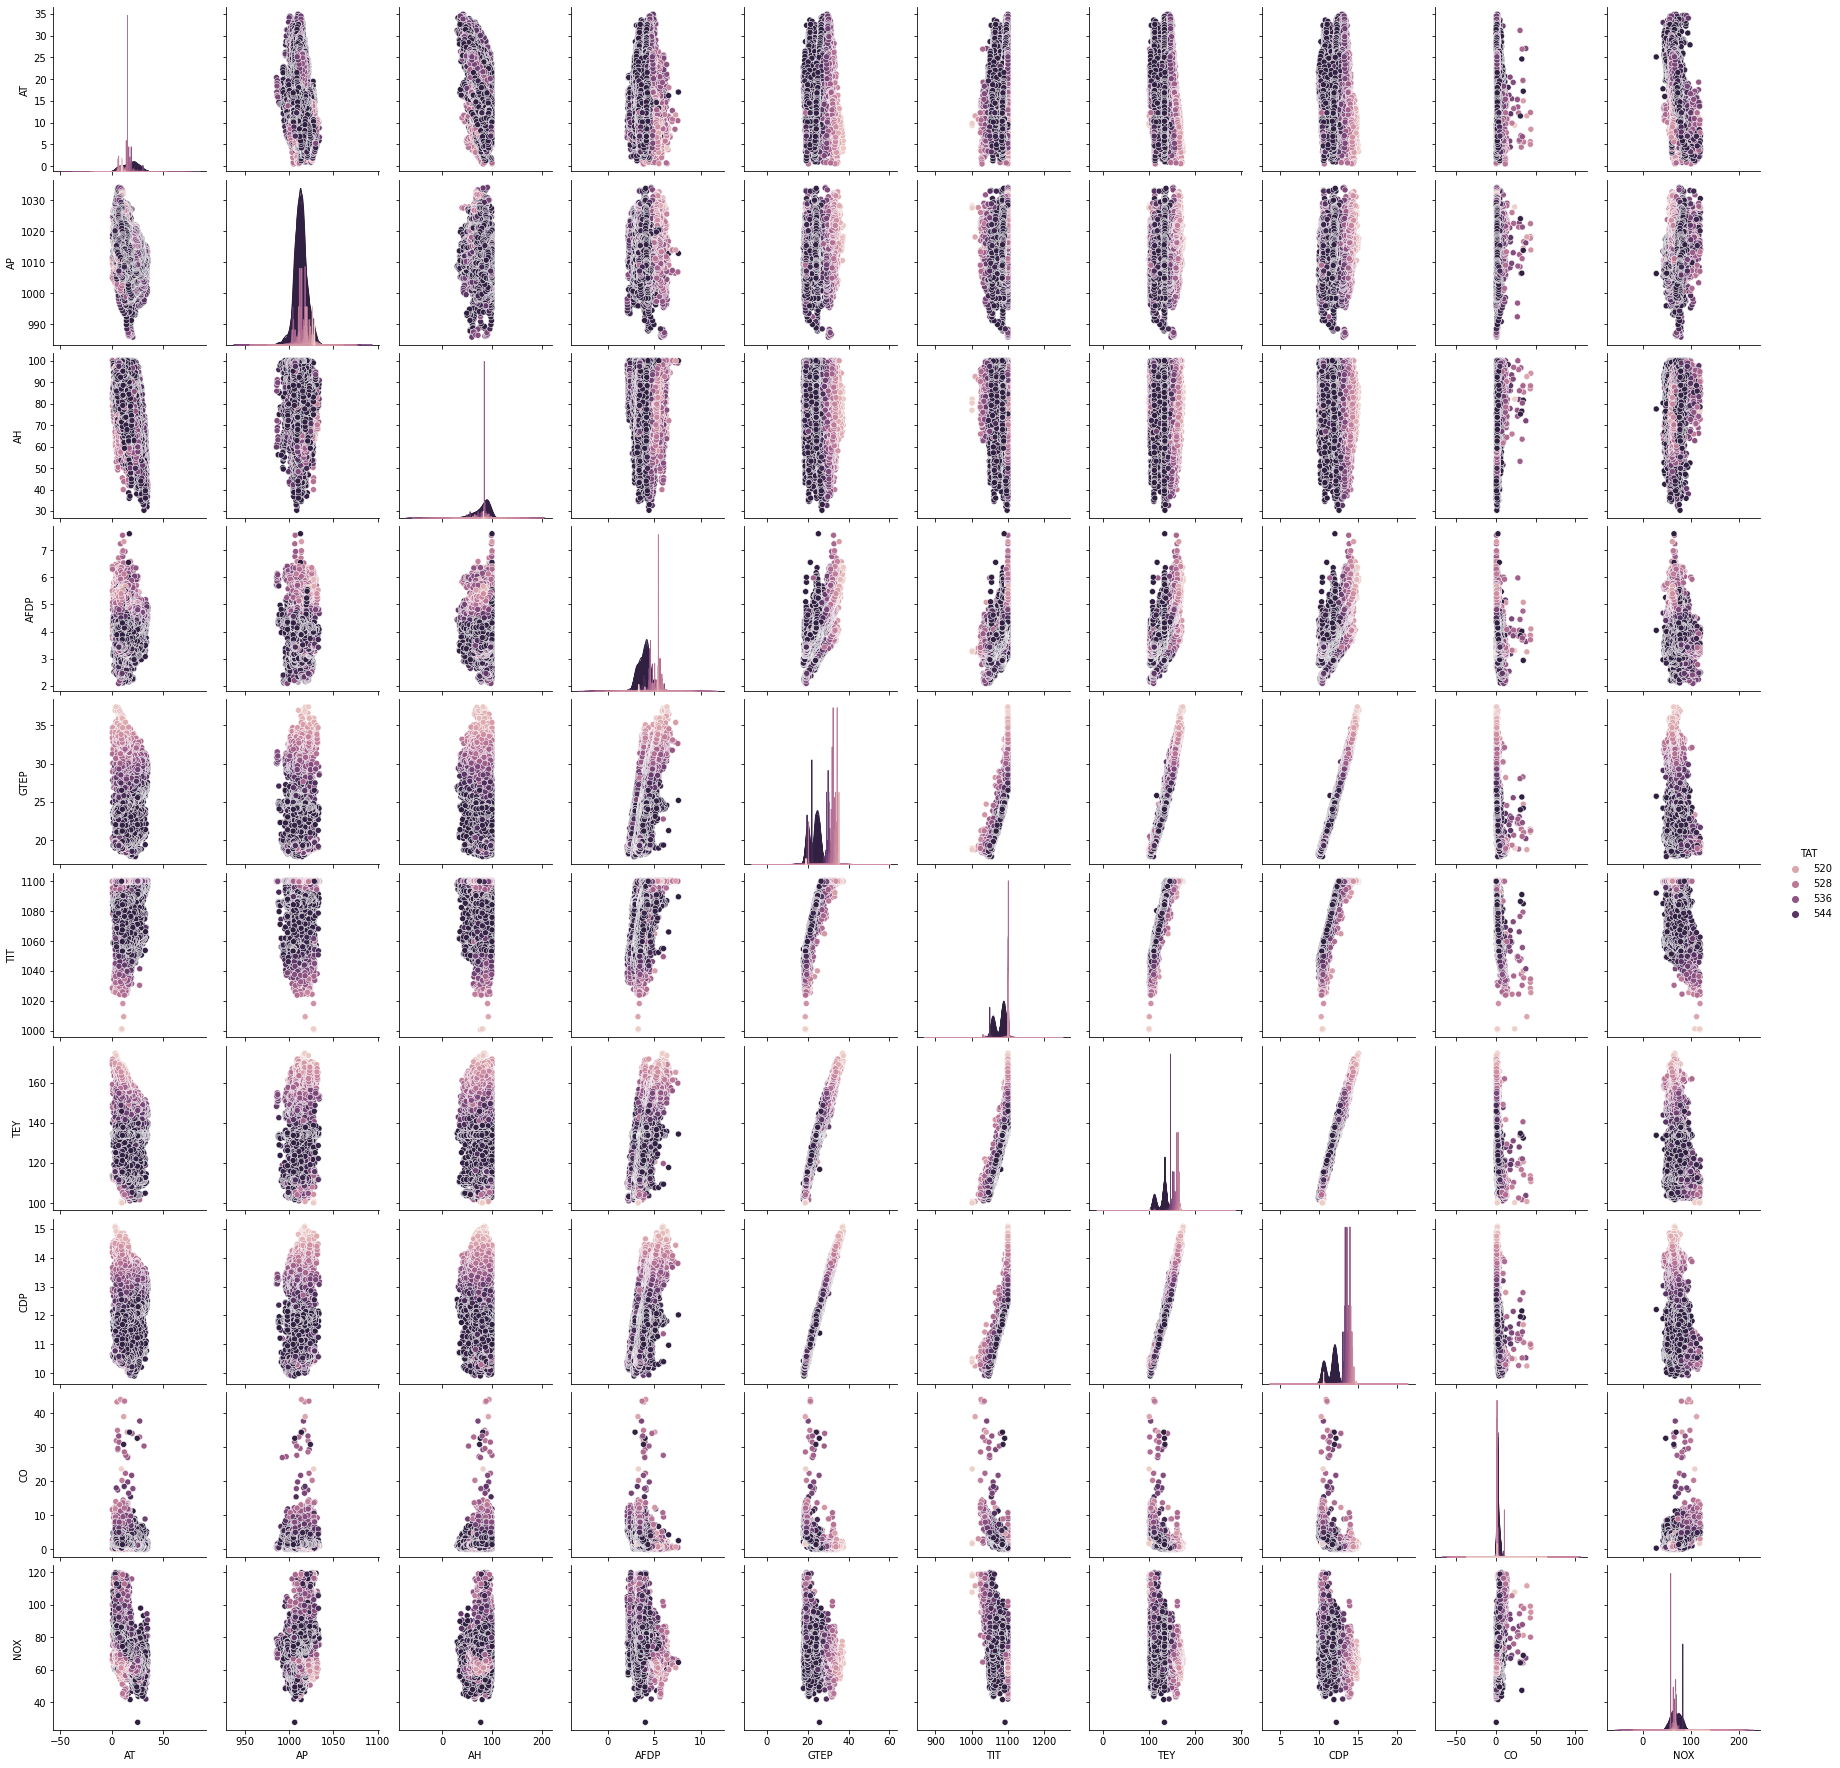

In [10]:
#pairwise plot of all the features
import warnings 
warnings.filterwarnings("ignore")
sns.pairplot(gas_turbines,hue='TAT')
plt.show()

## Feature Scaling¶
#### Normalising the data as there is scale difference¶


In [11]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
### We should normalize Input variables 
gas_turbines1=norm_func(gas_turbines)
gas_turbines1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [13]:
predictors = gas_turbines1.drop(['TEY'],axis=1)
target = gas_turbines1.iloc[:,7]

In [14]:
predictors.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087


In [15]:
target.head()

0    0.195191
1    0.195459
2    0.195325
3    0.195459
4    0.195459
Name: TEY, dtype: float64

In [16]:
X = predictors.values
Y = target.values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3)

Model Building

In [18]:
# Import all needed libraries and sublibraries

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

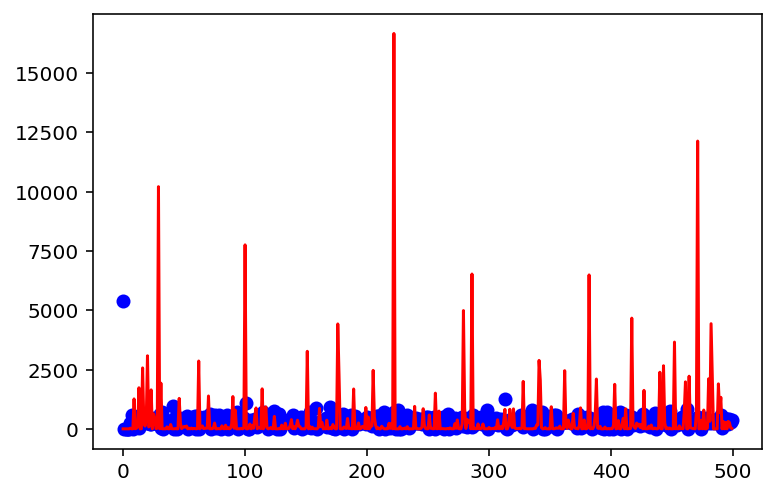

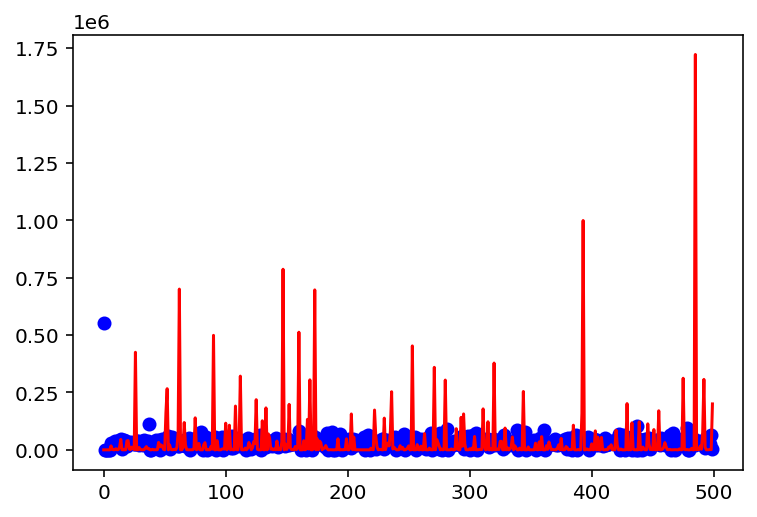

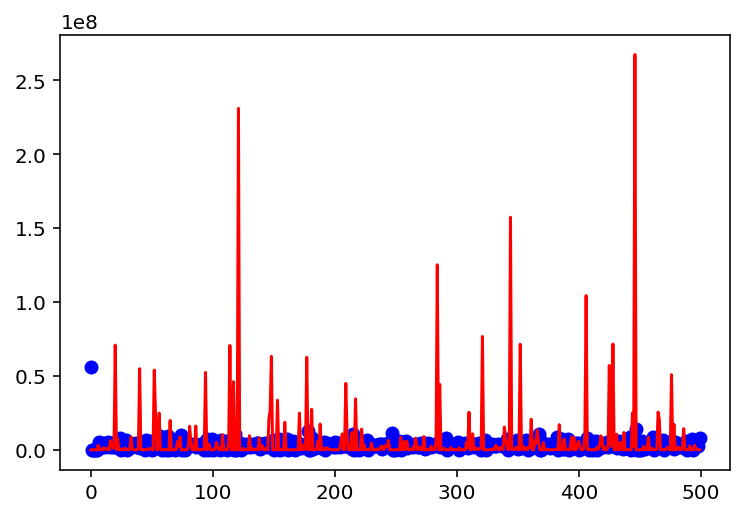

In [19]:
# Plots the results of a learning rate of 100, 1000, and 10000 respectively, with all other parameters constant

LR = [100,1000,10000]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(10,)))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    #Fits model
    history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

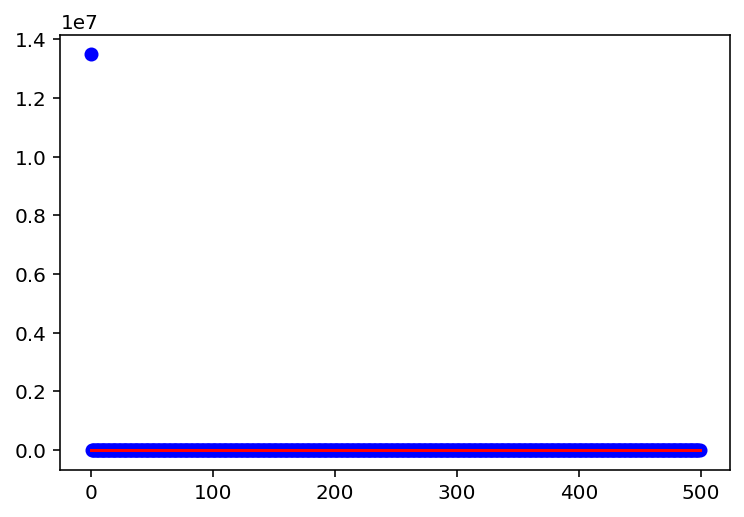

In [20]:
# Runs and plots the performance of a model with the same parameters from before (and a learning rate of 10000), 
# but now with an activation function (Relu)

model = Sequential()
model.add(Dense(1, input_shape=(10,), activation = 'relu'))
model.compile(Adam(lr=10000), 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [21]:
# Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
# with its current weights on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-4.622
The R2 score on the Test set is:	-4.615


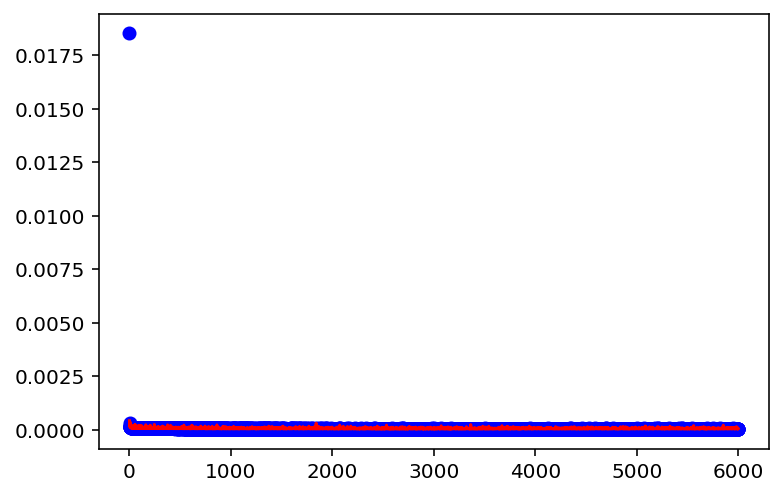

In [22]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(10,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Runs model for 2000 iterations and assigns this to 'history'
history = model.fit(x_train, y_train, epochs = 6000, validation_split = 0.2, verbose = 0)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [23]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.999
The R2 score on the Test set is:	0.999


<Figure size 432x288 with 0 Axes>

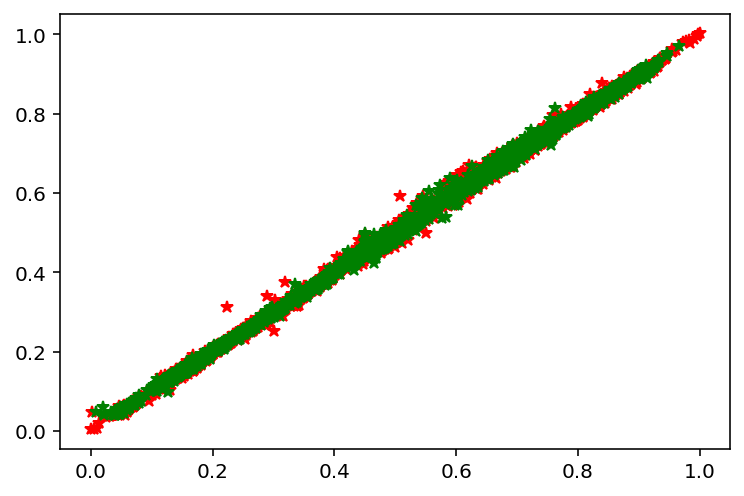

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()


In [ ]:
### From the above visualizations we can conclude that our ann is performing well in predicting the turbine energy yeild for gasturbines dataset